<a href="https://colab.research.google.com/github/bkantanmuda/JONATHAN_PBO_2025/blob/main/JOBSHEET_2_VisiKomputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 2 - Klasifikasi Gambar
### Jonathan Edward Sinaga
### 4.33.24.0.14
### TI-2A

## D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

### Pratikum

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


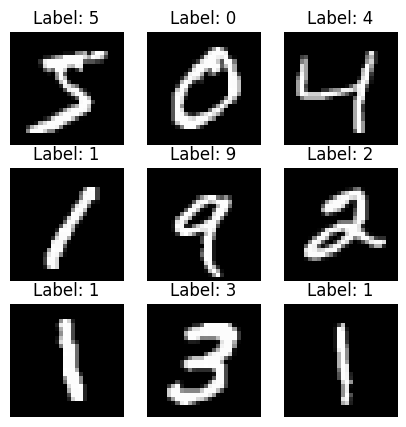

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


### Tugas Kecil

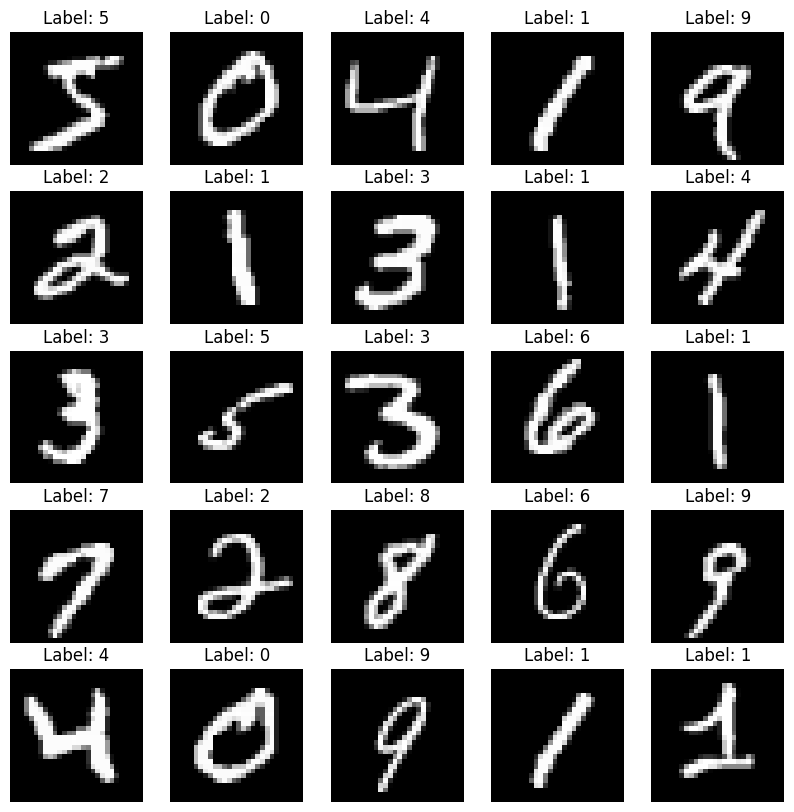

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

## D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

### Pratikum

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


### Tugas Kecil

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## D3 - Membangun CNN Sederhana

### Pratikum

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8936 - loss: 0.3510 - val_accuracy: 0.9802 - val_loss: 0.0704
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9804 - loss: 0.0672 - val_accuracy: 0.9833 - val_loss: 0.0642
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9879 - loss: 0.0408 - val_accuracy: 0.9882 - val_loss: 0.0487
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9877 - val_loss: 0.0455
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9868 - val_loss: 0.0512


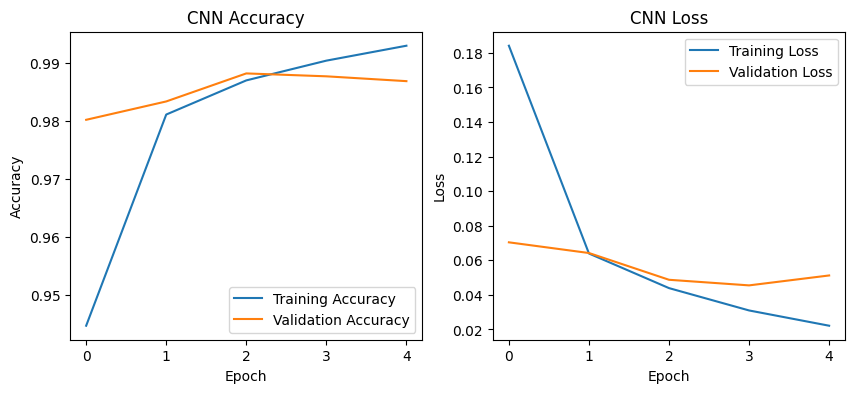

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas Kecil

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8881 - loss: 0.3438 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9905 - val_loss: 0.0384
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9895 - val_loss: 0.0393
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9870 - val_loss: 0.0471


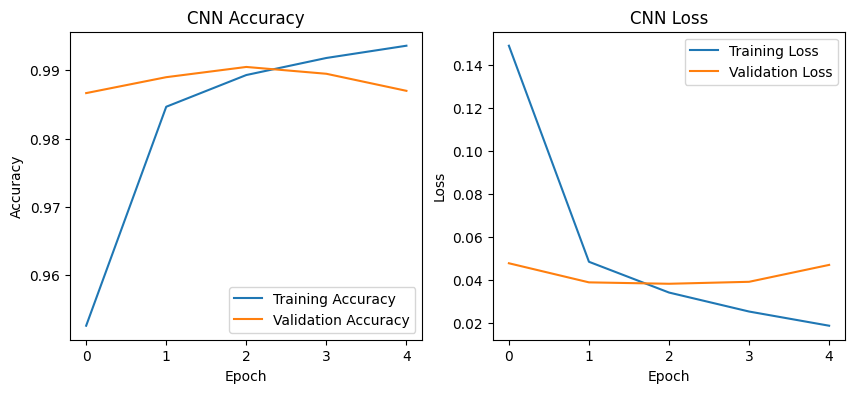

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi dan reshape untuk CNN
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

# Model CNN dengan tambahan Conv2D kedua
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),   # 🔥 tambahan Conv2D
    layers.MaxPooling2D((2,2)),                    # pooling lagi biar lebih rapih
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR - 10)

### Pratikum

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 41ms/step - accuracy: 0.3706 - loss: 1.7245 - val_accuracy: 0.5758 - val_loss: 1.2054
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5772 - loss: 1.1922 - val_accuracy: 0.6176 - val_loss: 1.1025
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6373 - loss: 1.0362 - val_accuracy: 0.6406 - val_loss: 1.0331
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6745 - loss: 0.9391 - val_accuracy: 0.6686 - val_loss: 0.9670
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7027 - loss: 0.8561 - val_accuracy: 0.6876 - val_loss: 0.9177
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7219 - loss: 0.7986 - val_accuracy: 0.6860 - val_loss: 0.9347
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7450 - loss: 0.7347 - val_accuracy: 0.6860 - val_loss: 0.9523
Epoch 8/10
1407/1407 ━

Text(0, 0.5, 'Loss')

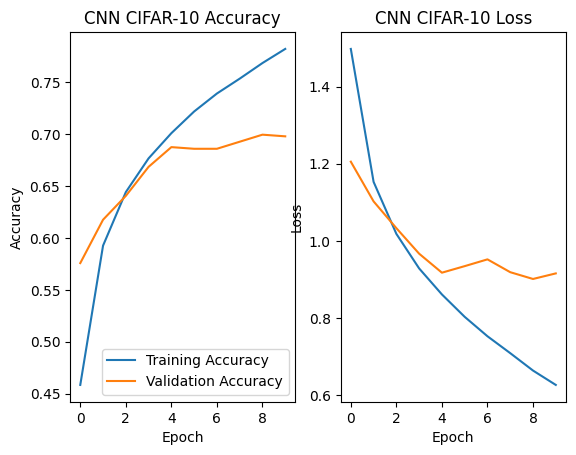

In [7]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history ===== plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Tugas Kecil

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 41ms/step - accuracy: 0.3739 - loss: 1.7243 - val_accuracy: 0.5488 - val_loss: 1.2865
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.5773 - loss: 1.1921 - val_accuracy: 0.6266 - val_loss: 1.0702
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6330 - loss: 1.0546 - val_accuracy: 0.6358 - val_loss: 1.0237
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.6629 - loss: 0.9663 - val_accuracy: 0.6704 - val_loss: 0.9595
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6964 - loss: 0.8783 - val_accuracy: 0.6710 - val_loss: 0.9467
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7150 - loss: 0.8280 - val_accuracy: 0.6932 - val_loss: 0.9046
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.7298 - loss: 0.7840 - val_accuracy: 0.6902 - val_loss: 0.9149
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.7391 -

Text(0, 0.5, 'Loss')

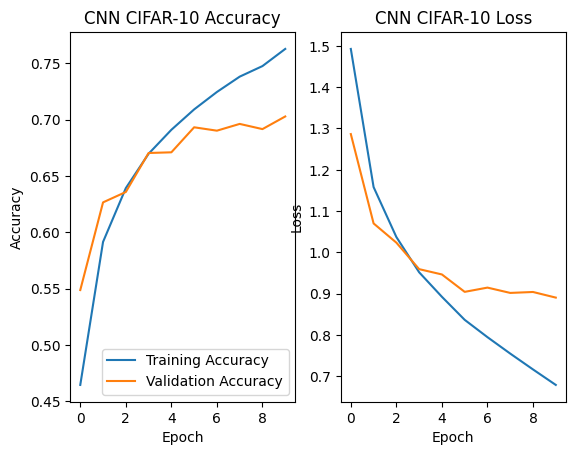

In [8]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout (0,5) , # tambahan lapisan Dropout
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history ===== plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## D5 - Transfer Learning dengan Model Pra-Latih

### Pratikum

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 581s 412ms/step - accuracy: 0.4490 - loss: 1.5578 - val_accuracy: 0.5712 - val_loss: 1.2235
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 592s 390ms/step - accuracy: 0.5806 - loss: 1.2032 - val_accuracy: 0.5978 - val_loss: 1.1648
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 572s 407ms/step - accuracy: 0.5983 - loss: 1.1479 - val_accuracy: 0.6028 - val_loss: 1.1501
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 640s 420ms/step - accuracy: 0.6200 - loss: 1.0905 - val_accuracy: 0.6092 - val_loss: 1.1214
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 581s 413ms/step - accuracy: 0.6302 - loss: 1.0602 - val_accuracy: 0.5942 - val_loss: 1.1511


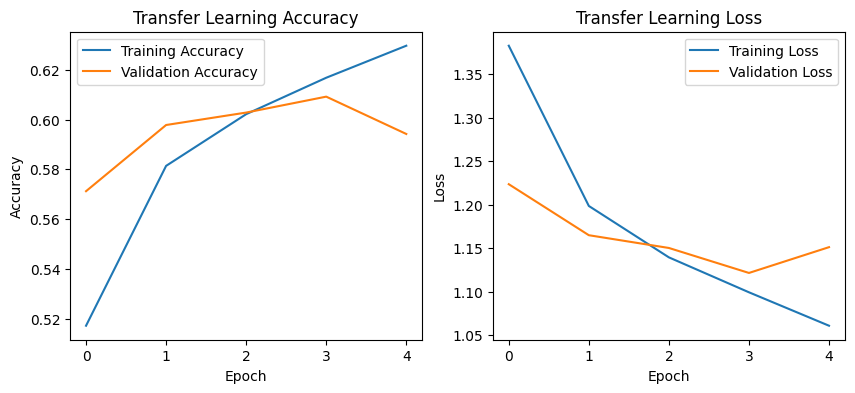

In [9]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas Kecil

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load base VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Aktifkan trainable tapi freeze sebagian besar
base_model.trainable = True

# Bekukan semua layer kecuali 2 terakhir
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 462ms/step - accuracy: 0.5041 - loss: 1.3986 - val_accuracy: 0.6252 - val_loss: 1.0514
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 657s 467ms/step - accuracy: 0.6338 - loss: 1.0450 - val_accuracy: 0.6444 - val_loss: 1.0064
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 626s 445ms/step - accuracy: 0.6587 - loss: 0.9668 - val_accuracy: 0.6536 - val_loss: 1.0015
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 706s 462ms/step - accuracy: 0.6736 - loss: 0.9200 - val_accuracy: 0.6612 - val_loss: 0.9740
Epoch 5/5
 460/1407 ━━━━━━━━━━━━━━━━━━━━ 6:22 404ms/step - accuracy: 0.6898 - loss: 0.8889

## D6 - Evaluasi dengan Cunfision Matrix dan Metrik Lain

### Pratikum

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Tugas Kecil

In [ ]:
# --- Install & Import ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from PIL import Image
import cv2

# --- Load dataset MNIST ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten & normalisasi
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# --- Training SVM ---
clf = svm.SVC(kernel='linear', gamma='scale', probability=True)  # probability=True agar bisa predict_proba
clf.fit(x_train_flat[:5000], y_train[:5000])  # subset 5000 sample biar cepat

# Evaluasi di test set
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

# --- Upload file eksternal (misalnya 5.jpg, 6.jpg, 8.jpg) ---
from google.colab import files
uploaded = files.upload()  # pilih file dari PC

# --- Preprocessing gambar eksternal ---
def preprocess_image(img_path):
    # Baca gambar
    img = Image.open(img_path).convert('L')  # convert ke grayscale
    img = img.resize((28, 28))               # resize ke 28x28
    img_arr = np.array(img)
    # invert kalau background putih -> hitam (opsional, tergantung dataset)
    if np.mean(img_arr) > 127:
        img_arr = 255 - img_arr
    # Normalisasi
    img_arr = img_arr / 255.0
    return img_arr.reshape(1, -1)

# --- Prediksi untuk setiap file ---
for fname in uploaded.keys():
    x_flat = preprocess_image(fname)
    pred = int(clf.predict(x_flat)[0])
    conf = float(np.max(clf.predict_proba(x_flat)))
    print(f"{fname} -> Prediksi SVM: {pred} (p≈{conf:.2f})")

    # tampilkan gambar
    plt.imshow(Image.open(fname), cmap='gray')
    plt.title(f"Prediksi: {pred} (p≈{conf:.2f})")
    plt.axis("off")
    plt.show()
